In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Step 1: Load the dataset with proper encoding and delimiters, then select only necessary columns
df = pd.read_csv('/Users/dhruvpai/Downloads/practicals/spam.csv', encoding='ISO-8859-1')
df = df[['v1', 'v2']]  # Select only the two main columns
# Rename columns for better readability
df.columns = ['label', 'message']
# Check the first few rows to ensure the data is loaded correctly
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Step 2: Data preprocessing
# Convert labels to binary values (ham: 0, spam: 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [21]:
# Drop any rows with missing values (if any)
df.dropna(subset=['message'], inplace=True)

In [22]:
# Step 3: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)  # Ignore common words and set max document frequency
X = vectorizer.fit_transform(df['message'])  # Convert messages to a TF-IDF matrix
y = df['label']  # Labels (0 for ham, 1 for spam)

In [23]:
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Step 5: Training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with k=5 (can be tuned)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Step 6: Making predictions and evaluating the model
y_pred = knn.predict(X_test)

In [27]:
# Step 7: Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9103139013452914

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.33      0.50       150

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115


Confusion Matrix:
 [[965   0]
 [100  50]]


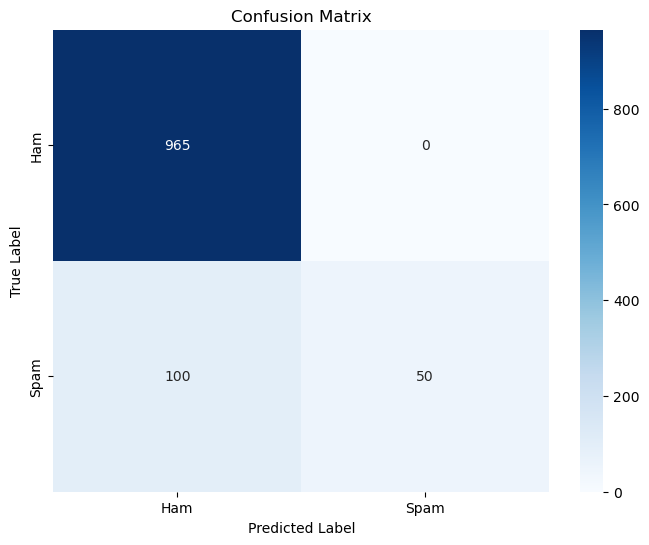

In [30]:
# Visualization of Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

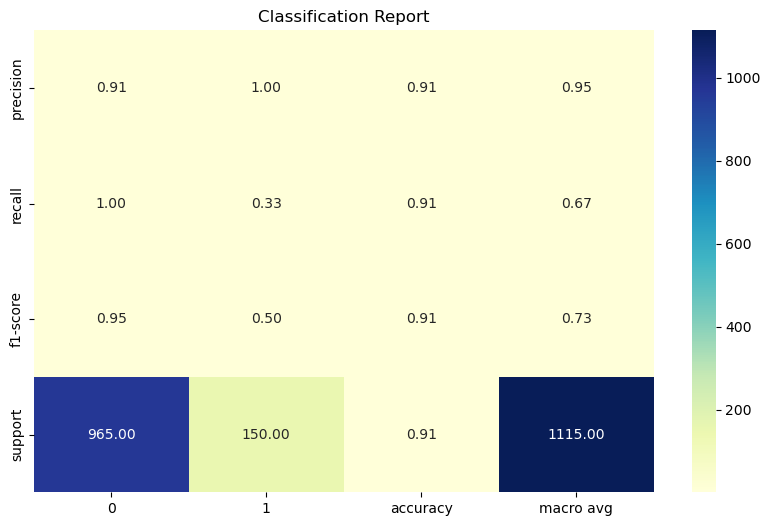

In [31]:
# Visualization of Classification Report
# Extracting precision, recall, f1-score, and support for each class
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Classification Report')
plt.show()

Explanation of the Code
----
Data Loading and Selection: The dataset is loaded, and only the relevant columns (v1 and v2) are selected. v1 (label) is renamed to label and v2 (message) to message.

Preprocessing: Labels are mapped to binary values (ham: 0, spam: 1), which makes them suitable for classification. Any rows with missing messages are dropped.

TF-IDF Vectorization: Text data is converted into a TF-IDF matrix, where common words are ignored, and highly frequent words are controlled with a max_df setting.

Data Splitting: The dataset is split into training (80%) and testing (20%) sets.

Model Training: A KNN classifier with k=5 is initialized and trained using the training data.

Prediction and Evaluation: The model makes predictions on the test set. Its performance is evaluated using accuracy, a classification report (precision, recall, F1-score), and a confusion matrix.

Visualizations: The confusion matrix and classification report are displayed using seaborn heatmaps for easy interpretation.

Questions:
----
1. What is Porter Stemmer's Algorithm?
- Porter Stemmer is a text preprocessing algorithm used in natural language processing (NLP) for stemming, which means reducing words to their root form. It removes common suffixes like "ing," "ed," and "ly" to group related words together, which can improve text matching and reduce feature dimensions in NLP tasks.


2. Why did you use the k-NN algorithm for this problem?
- The k-NN algorithm is simple, easy to implement, and works well on small datasets like this one. It classifies messages based on the majority label of the k-nearest neighbors, making it suitable for binary classification problems like spam detection, where the message text patterns can indicate similarity between spam and ham messages.


3. Is this supervised learning or unsupervised learning?
- This is a supervised learning problem because the model is trained with labeled data (each message is labeled as "ham" or "spam"). The model learns to map messages to their labels based on the labeled training data.


4. What are the different algorithms that can replace k-NN here?

- *Several algorithms could replace k-NN, including:*

- Naive Bayes: Often used for text classification due to its probabilistic nature and efficiency on high-dimensional data.
- Support Vector Machine (SVM): Known for its accuracy in text classification and spam detection.
- Logistic Regression: Effective for binary classification and interpretable.
- Random Forest: An ensemble method that can handle both high-dimensional and imbalanced data well.


5. What steps can be taken to improve accuracy further?

- *To improve accuracy, consider:*

- Tuning k: Experiment with different values for k to find the optimal value.
- Using Different Feature Extraction: For example, applying CountVectorizer or adding n-grams to capture more context.
- Trying Other Algorithms: Algorithms like Naive Bayes or SVM may yield better accuracy.
- Hyperparameter Tuning: Use cross-validation and grid search to fine-tune hyperparameters.
- Preprocessing Enhancements: Further preprocessing with lemmatization or advanced tokenization methods to clean data.